In [198]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [199]:
mushrooms.df=pd.read_csv('mushrooms.csv')
mushrooms.df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [200]:
mushrooms.df.shape

(8124, 23)

In [201]:
mushrooms.df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [202]:
mushrooms.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='class', ylabel='count'>

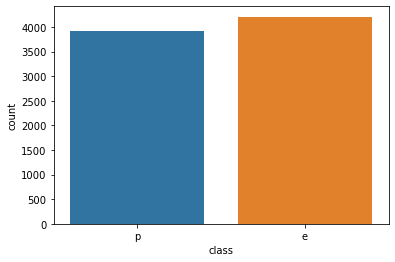

In [204]:
sns.countplot(mushrooms.df['class'])

<Figure size 1008x432 with 0 Axes>

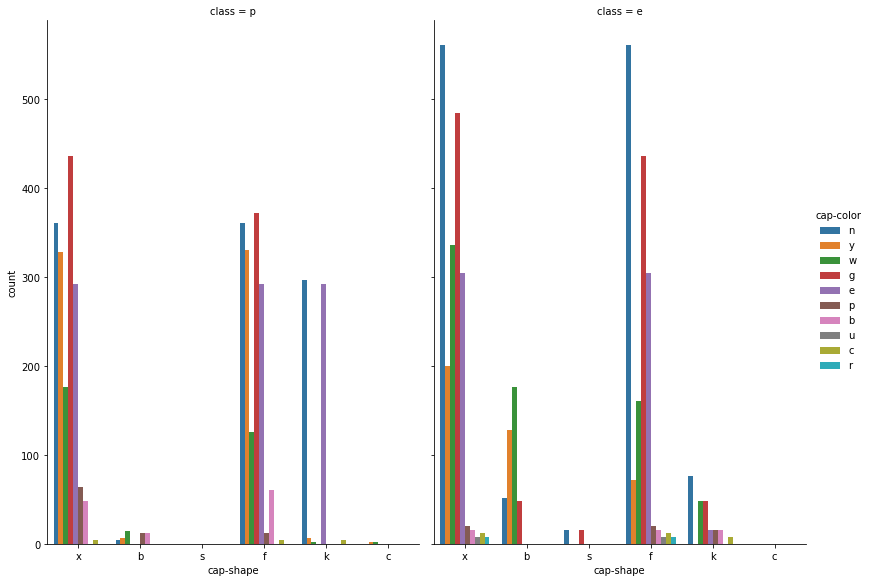

In [205]:
plt.figure(figsize=(14,6))
g = sns.catplot(x='cap-shape',hue='cap-color',col='class',
                data=mushrooms.df, kind='count',
               height=8,aspect=.7)


1.White coloured bell shaped mushrooms are recommendend for eating



2.Red coloured knobbed shaped mushrooms are poisonous.


<Figure size 1008x432 with 0 Axes>

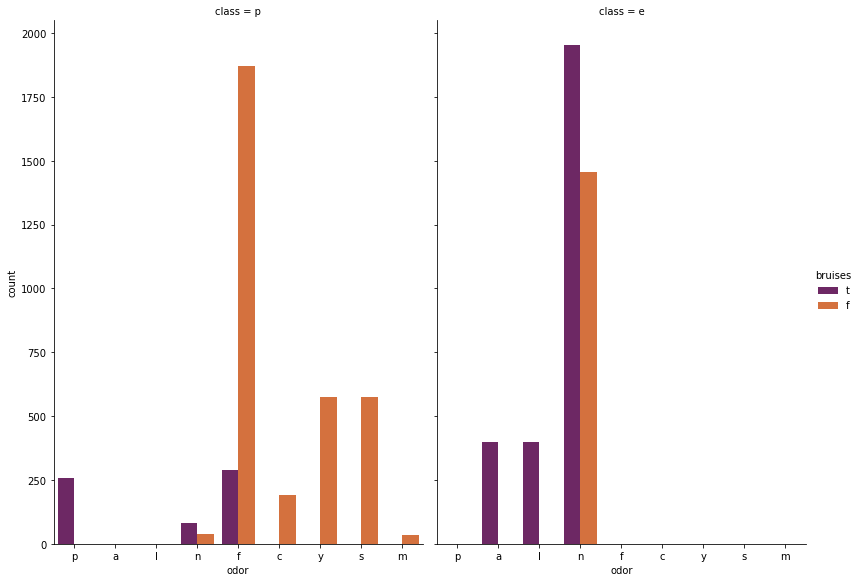

In [206]:
plt.figure(figsize=(14,6))
g = sns.catplot(x='odor',hue='bruises',col='class',
                data=mushrooms.df, kind='count',
               height=8,aspect=.7,palette='inferno')


1. Mushrooms with no odor and bruises are edible


2. Mushrooms with fishy odor and no brusies are posionous.

<Figure size 1008x432 with 0 Axes>

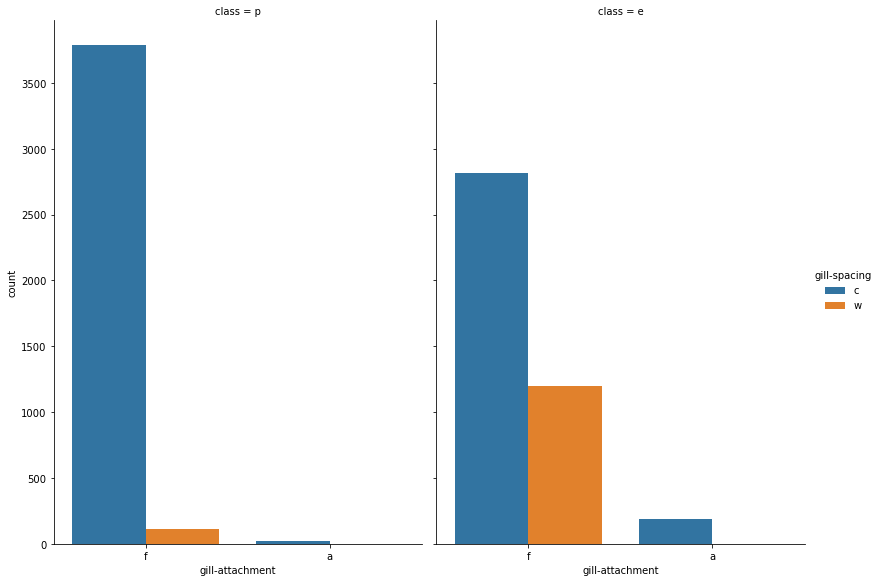

In [207]:
plt.figure(figsize=(14,6))
g = sns.catplot(x='gill-attachment',hue='gill-spacing',col='class',
                data=mushrooms.df, kind='count',
               height=8,aspect=.7)

<Figure size 1008x432 with 0 Axes>

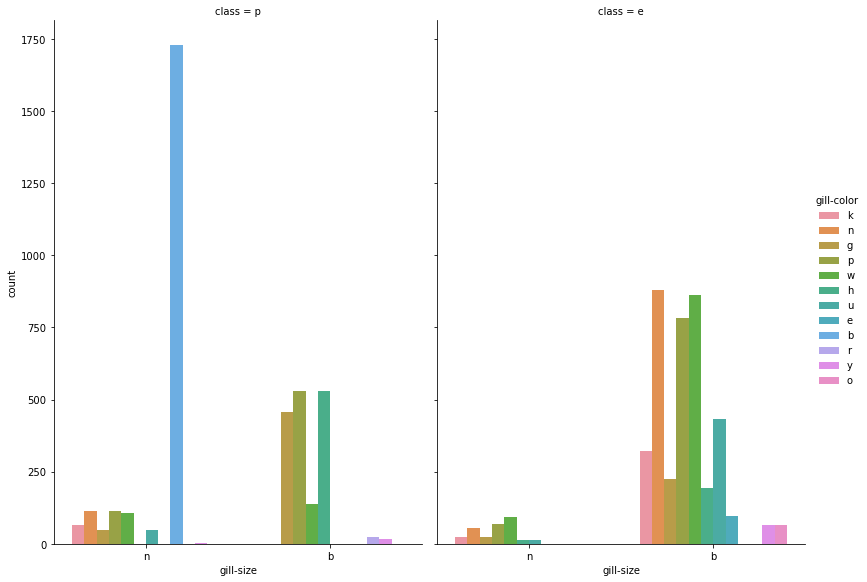

In [208]:
plt.figure(figsize=(14,6))
g = sns.catplot(x='gill-size',hue='gill-color',col='class',
                data=mushrooms.df, kind='count',
               height=8,aspect=.7)

1. Most probably buffed and narrow mushrooms are poisonous.



2. Some of the brown broad mushrooms and white broad mushrooms are edible.

In [150]:
le=LabelEncoder()
mushrooms=mushrooms.df.apply(LabelEncoder().fit_transform)
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [151]:
x=mushrooms.drop(['class'],axis=1)
y=mushrooms['class']

In [152]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [153]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [154]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [155]:
x_train.shape

(5686, 22)

In [156]:
y_train.shape

(5686,)

In [157]:
dt=DecisionTreeClassifier(random_state=0, max_depth= 5)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy_score = ',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy_score =  0.9827727645611156
[[1244   28]
 [  14 1152]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1272
           1       0.98      0.99      0.98      1166

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [158]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.9778403095321843
0.9827727645611156


In [159]:
rf=RandomForestClassifier(max_depth=5)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy score
0.9905660377358491
[[1272    0]
 [  23 1143]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [160]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9899753781217024
0.9905660377358491


In [161]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score = ',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

accuracy_score =  0.9491386382280558
[[1222   50]
 [  74 1092]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1272
           1       0.96      0.94      0.95      1166

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [162]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score
0.9150943396226415
[[1158  114]
 [  93 1073]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1272
           1       0.90      0.92      0.91      1166

    accuracy                           0.92      2438
   macro avg       0.91      0.92      0.91      2438
weighted avg       0.92      0.92      0.92      2438



In [163]:
sv=SVC()
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print('accuracy score')
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score
0.9897456931911403
[[1270    2]
 [  23 1143]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [164]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [165]:
print(svmkernel('rbf'))
print('\n')
print(svmkernel('poly'))

0.9897456931911403
[[1270    2]
 [  23 1143]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

None


0.9975389663658737
[[1272    0]
 [   6 1160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      0.99      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

None


In [166]:
model= [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),GaussianNB(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')


Accuracy score of DecisionTreeClassifier() is:
1.0
[[1272    0]
 [   0 1166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Accuracy score of SVC() is:
0.9897456931911403
[[1270    2]
 [  23 1143]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Accuracy score of RandomForestClassifier() is:
1.0
[[1272    0]
 [   0 1166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
   

In [169]:
from sklearn.model_selection import cross_val_score

In [171]:
from sklearn.svm import SVC
svcscores =  cross_val_score(sv,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.81292308 0.99507692 0.89907692 1.         0.49938424]
0.841292231906025 0.18432734128969022


In [173]:
from sklearn.tree import DecisionTreeClassifier
dtscores=cross_val_score(dt,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.84246154 0.99692308 0.95076923 1.         0.68472906]
0.894976582038651 0.11958066266635756


In [175]:
from sklearn.ensemble import RandomForestClassifier
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.83569231 0.99507692 0.95015385 1.         0.64655172]
0.8854949602122015 0.1333225836210557


In [177]:
lgscores=cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.63015385 0.98276923 0.87569231 0.99815385 0.71366995]
0.8400878363016295 0.14605771748890695


In [178]:
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]
0.7259685486926866 0.15415819916568615


In [181]:

import joblib
#from sklearn.externals import jobib

#save the model as a object file
joblib.dump(dt,'dtcfile.obj')
#load the model from the file

dtc_from_joblib= joblib.load('dtcfile.obj')

#use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([1, 0, 0, ..., 1, 1, 1])

In [182]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=40)
#randonforestclassifier(100)-----default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1272    0]
 [   0 1166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [183]:
from sklearn.ensemble import AdaBoostClassifier
#adaboostclassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

1.0
[[1272    0]
 [   0 1166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [184]:
#Import support vector classifier
from sklearn.svm import SVC
svc=SVC()

#create adaboostclassifier object
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)

ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.5217391304347826
[[1272    0]
 [1166    0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1272
           1       0.00      0.00      0.00      1166

    accuracy                           0.52      2438
   macro avg       0.26      0.50      0.34      2438
weighted avg       0.27      0.52      0.36      2438



In [193]:
from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
df=pd.read_csv('mushrooms.csv')
parameters = {'kernel':['linear','poly','rbf'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)

clf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'poly', 'rbf']})

In [194]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [195]:
sv=svm.SVC(kernel='linear',C=1)
sv.fit(x,y)
t=sv.score(x,y)
print(round(t,2))

0.98


In [196]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc= DecisionTreeClassifier()
df=pd.read_csv('mushrooms.csv')
grid_param = {
    'criterion':['gini','entropy']
    }

#gridk={'kernel':['linear','poly','rbf']}

gd_sr= GridSearchCV(estimator=dtc,
                   param_grid=grid_param,
                   scoring='accuracy',
                   cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result= gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.9610985979537704
